<h1 style = "text-align: center;"><strong>BOOK ANALYSIS NOTEBOOK</strong></h1>

---
<h2 style = "text-align: center;"><em>State the Problem</em></h2>

<h3 style = "text-align: center;">"5W1H" Method</h3>

I want to determine the themes of books, from the Gutenberg Project, to guide reading selection.

In [5]:
# Specific ? Measurable ? Achievable ? Relevant ? Time-bound ?

---
<h2 style = "text-align: center;"><em>Prepare the Tools</em></h2>

<h3 style = "text-align: center;">Resources</h3>

<ul>
    <li>Domain Documentation
        <ul>
            <li><a href="https://fr.wikipedia.org/wiki/Projet_Gutenberg">Wikipedia: Gutenberg Project</a></li>
        </ul>
    </li>
    <br>
    <li>Technical Documentation
        <ul>
            <li><a href="https://beautiful-soup-4.readthedocs.io/en/latest/">BeautifulSoup</a></li>
            <li><a href="https://nltk.readthedocs.io/en/latest/">Natural Language ToolKit</a></li>
            <li><a href="https://matplotlib.org/stable/">Matplotlib</a></li>
        </ul>
    </li>
</ul>

<h3 style = "text-align: center;">Libraries</h3>

In [10]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
nltk.download("gutenberg", quiet = True)
nltk.download("punkt", quiet = True)
nltk.download("stopwords", quiet = True)
import re
import spacy
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<h3 style = "text-align: center;">Functions</h3>

In [12]:
# Define a function to scrape a webpage
def scrape_webpage(webpage_url):
    """
    Purpose: 
        Scrape a webpage to retrieve its HTML content
    Parameters:
        url (str): The URL of the webpage to scrape
    Returns:
        str: HTML content of the webpage; if the request is successful
        or 
        None: if the request fails
    """
    try:
        http_response = requests.get(webpage_url)
        if http_response.status_code == 200:
            html_content = BeautifulSoup(http_response.text, "html.parser")
            return html_content
        else:
            print(f"Error: Status code {http_response.status_code}")
            return None
    
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        raise


# Define a function to check a text
def check_text(text, return_statistics_dict = True):
    """
    Purpose: 
        Calculate and print statistics about a given text
    Parameters:
        text (str): The text to analyze
        return_statistics_dict (bool): Flag indicating whether to return the statistics as a dictionary
    Returns:
        dict: A dictionary containing statistics about the text
    """
    try:
        first_500_characters = text[:500]
        last_500_characters = text[-500:]
        text_length = len(text)
        words_list = word_tokenize(text)
        sentences_list = sent_tokenize(text)
        words_count = len(words_list)
        words_lengths_list = [len(word) for word in words_list]
        words_minimum_length = min(words_lengths_list)
        words_maximum_length = max(words_lengths_list)
        words_average_length = sum(words_lengths_list) / len(words_lengths_list)        
        words_frequencies = FreqDist(words_list)
        most_common_words = words_frequencies.most_common(10)
        sentences_count = len(sentences_list)
        sentences_lengths_list = [len(word_tokenize(sentence)) for sentence in sentences_list]
        sentences_minimum_length = min(sentences_lengths_list, default = 0)
        sentences_maximum_length = max(sentences_lengths_list, default = 0)
        sentences_average_length = sum(sentences_lengths_list) / len(sentences_lengths_list) if sentences_lengths_list else 0
        
        statistics_dict = {
            "first_500_characters": first_500_characters,
            "last_500_characters": last_500_characters,
            "text_length": text_length,
            "words_list": words_list,
            "sentences_list": sentences_list,
            "words_count": words_count,
            "words_lengths_list": words_lengths_list,
            "words_minimum_length": words_minimum_length,
            "words_maximum_length": words_maximum_length,
            "words_average_length": words_average_length,    
            "words_frequencies": words_frequencies,
            "most_common_words": most_common_words,
            "sentences_count": sentences_count,
            "sentences_lengths_list": sentences_lengths_list,
            "sentences_minimum_length": sentences_minimum_length,
            "sentences_maximum_length": sentences_maximum_length,
            "sentences_average_length": sentences_average_length
        }
        if return_statistics_dict:
            return statistics_dict
    
        else:
            print("FIRST 500 CHARACTERS")
            print(first_500_characters)
            print()
            print("LAST 500 CHARACTERS")
            print(last_500_characters)
            print()
            print("STATISTICS OF THE UNPROCESSED TEXT")
            print(f"Count of characters: {text_length}")
            print(f"Count of words: {words_count}")
            print(f"Count of most common words: {most_common_words}")
            print(f"Minimum length of words: {words_minimum_length} characters")
            print(f"Maximum length of words: {words_maximum_length} characters")
            print(f"Average length of words: {words_average_length:.0f} characters")
            print(f"Count of sentences: {sentences_count}")
            print(f"Minimum length of sentences: {sentences_minimum_length} words")
            print(f"Maximum length of sentences: {sentences_maximum_length} words")
            print(f"Average length of sentences: {sentences_average_length:.0f} words")

    except Exception as e:
        print(f"Error: {e}")
        raise


# Define a function to lemmatize a text
spacy_model_instance = spacy.load("en_core_web_sm")
def lemmatize_text(text):
    """
    Purpose: 
        Lemmatize a given text and remove stopwords
    Parameters:
        text (str): The text to lemmatize
    Returns:
        str: A string containing the lemmatized text
    """
    try:
        spacy_model_instance_doc = spacy_model_instance(text)
        lemmatized_words_list = [
            word.lemma_ for word in spacy_model_instance_doc
        ]
        lemmatized_text = " ".join(lemmatized_words_list)
        return lemmatized_text
        
    except Exception as e:
        print(f"Error: {e}")
        raise


# Define a function to process a text
def process_text(text):
    """
    Purpose: 
        Preprocess a given text by converting it to lowercase, and removing punctuation and stopwords
    Parameters:
        text (str): The text to process
    Returns:
        str: The preprocessed text
    """
    try:
        lowercase_text = text.lower()
        text_without_punctuation = re.sub(r"[^\w\s]", "", lowercase_text)
        words_list = word_tokenize(text_without_punctuation)
        english_stopwords = set(stopwords.words("english"))
        filtered_words_list = [word for word in words_list if word not in english_stopwords]
        preprocessed_text = " ".join(filtered_words_list)
        return preprocessed_text
        
    except Exception as e:
        print(f"Error: {e}")
        raise


# Define a function to check the directory
def check_directory():
    """
    Purpose:
        Check the current directory and its contents
    Parameters:
        None
    Returns:
        None: This function prints the current directory and its contents to the console
    """
    try:
        current_directory = os.getcwd()
        print("DIRECTORY")
        print(current_directory)
        print()
        print("FILES IN DIRECTORY")
        files = os.listdir(current_directory)
        if files:
            for file in files:
                print(file)
            print()
        else:
            print("Files not found")
            
    except Exception as e:
        print(f"Error: {e}")
        raise


# Define a function to display a wordcloud
def display_wordcloud(text, max_words = 50):
    """
    Purpose: 
        Display a word cloud of the most common words
    Parameters:
        text (str): The text used to generate the word cloud
        max_words (int): The maximum number of words to display in the word cloud
    Returns:
        object: An object representing the word cloud of the most common words
    """
    try:
        words_list = word_tokenize(text)       
        word_frequencies = FreqDist(words_list)
        wordcloud = WordCloud(
            max_words = max_words,
            width = 800,
            height = 400,
            background_color = "black",
            colormap = "viridis"
        ).generate_from_frequencies(word_frequencies)
        plt.figure(figsize = (15, 5))
        plt.imshow(wordcloud, interpolation = "bilinear")
        plt.axis("off")
        plt.show()
        return wordcloud
        
    except Exception as e:
        print(f"Error: {e}")
        raise

---
<h2 style = "text-align: center;"><em>Collect Data</em></h2>

<h3 style = "text-align: center;">Source(s)</h3>

<h4 style = "text-align: center;">Gutenberg Project Wiki</h4>

In [16]:
# Store the HTML content of the Gutenberg Project Wiki in a variable        
gutenberg_wiki_url = "https://en.wikipedia.org/wiki/Project_Gutenberg"
gutenberg_wiki_content = scrape_webpage(gutenberg_wiki_url)

<h4 style = "text-align: center;">Gutenberg Corpus</h4>

In [18]:
# Check file names in the Gutenberg corpus of the NLTK library
nltk_gutenberg_corpus = gutenberg.fileids()
print("FILE NAMES IN THE GUTENBERG CORPUS")
for file_name in nltk_gutenberg_corpus:
    print(file_name)

FILE NAMES IN THE GUTENBERG CORPUS
austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


In [19]:
# Store the texts to analyse in variables
alice_raw_text = gutenberg.raw("carroll-alice.txt")
moby_raw_text = gutenberg.raw("melville-moby_dick.txt")
leaves_raw_text = gutenberg.raw("whitman-leaves.txt")

<h3 style = "text-align: center;">Check(s)</h3>

<h4 style = "text-align: center;">Gutenberg Project Wiki</h4>

In [22]:
# Check the content of the Gutenberg Project Wiki
print(gutenberg_wiki_content.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Project Gutenberg - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-

In [23]:
# Check the content of the paragraphs
content_div_content = gutenberg_wiki_content.find("div", class_ = "mw-content-ltr mw-parser-output") 
content_div_paragraphs = content_div_content.find_all("p")
paragraphs_list = [paragraph.text for paragraph in content_div_paragraphs]
paragraphs_list[1:22]

['Project Gutenberg (PG) is a volunteer effort to digitize and archive cultural works, as well as to "encourage the creation and distribution of eBooks."[2] It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library.[3] Most of the items in its collection are the full texts of books or individual stories in the public domain. All files can be accessed for free under an open format layout, available on almost any computer. As of 13\xa0February\xa02024[update], Project Gutenberg had reached 70,000 items in its collection of free eBooks.[4]\n',
 'The releases are available in plain text as well as other formats, such as HTML, PDF, EPUB, MOBI, and Plucker wherever possible. Most releases are in the English language, but many non-English works are also available. There are multiple affiliated projects that provide additional content, including region- and language-specific works. Project Gutenberg is closely affiliated with Distributed Proofreaders, an Inter

<h4 style = "text-align: center;">"Alice in Wonderland" by Lewis Caroll</h4>

In [25]:
# Check "Alice in Wonderland" text
check_text(alice_raw_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an

LAST 500 CHARACTERS
ister of hers
would, in the after-time, be herself a grown woman; and how she would
keep, through all her riper years, the simple and loving heart of her
childhood: and how she would gather about her other little children, and
make THEIR eyes bright and eager with many a strange tale, perhaps even
with the dream of Wonderland of long ago: and how she would feel with
all their simple sorrows, and find a pleasure in all their simple joys,
remembering her 

<h4 style = "text-align: center;">"Moby Dick" by Herman Melville</h4>

In [27]:
# Check "Moby Dick" text
check_text(moby_raw_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teac

LAST 500 CHARACTERS
uoy shot
lengthwise from the sea, fell over, and floated by my side.  Buoyed
up by that coffin, for almost one whole day and night, I floated on a
soft and dirgelike main.  The unharming sharks, they glided by as if
with padlocks on their mouths; the savage sea-hawks sailed with
sheathed beaks.  On the second day, a sail drew near, nearer, and
picked me up at last.  It was the devious-cruising Rachel, that in
her retracing search after her missing children, only fou

<h4 style = "text-align: center;">"Leaves of Grass" by Walt Whitman</h4>

In [29]:
# Check "Leaves of Grass" text
check_text(leaves_raw_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
[Leaves of Grass by Walt Whitman 1855]


Come, said my soul,
Such verses for my Body let us write, (for we are one,)
That should I after return,
Or, long, long hence, in other spheres,
There to some group of mates the chants resuming,
(Tallying Earth's soil, trees, winds, tumultuous waves,)
Ever with pleas'd smile I may keep on,
Ever and ever yet the verses owning--as, first, I here and now
Signing for Soul and Body, set to them my name,

Walt Whitman



[BOOK I.  INSCRIPTIONS]

}  One's-Self I 

LAST 500 CHARACTERS
aration--Good-bye my Fancy.

Yet let me not be too hasty,
Long indeed have we lived, slept, filter'd, become really blended
    into one;
Then if we die we die together, (yes, we'll remain one,)
If we go anywhere we'll go together to meet what happens,
May-be we'll be better off and blither, and learn something,
May-be it is yourself now really ushering me to the true songs, (who
    knows?)
May-be it is you the mortal knob really undoing, turning--so n

<h3 style = "text-align: center;">Comment(s)</h3>

<ul>
    <li>Text size
        <ul>"Moby Dick" is significantly longer (1242990 characters) than "Alice in Wonderland" (144395 characters) and "Leaves of Grass" (711215 characters)</ul>
    </li>
    <br>
    <li>Most-common words
        <ul>For the 3 texts, the most common words are stop-words; to remove for a relevant analysis</ul>
    </li>
</ul>

---
<h2 style = "text-align: center;"><em>Clean and Prepare Data</em></h2>

<h3 style = "text-align: center;">Cleaning and Preparation</h3>

<h4 style = "text-align: center;">Gutenberg Project Wiki</h4>

In [35]:
# Join the paragraphs and Remove their index and "[update]"
joined_paragraphs = "\n".join(paragraphs_list[1:22])
gutenberg_wiki_cleaned_content = re.sub(r"\[\d+\]|\[update\]", "", joined_paragraphs)

<h4 style = "text-align: center;">"Alice in Wonderland" by Lewis Caroll</h4>

In [37]:
# Lemmatize and Process the raw text
alice_lemmatized_text = lemmatize_text(alice_raw_text)
alice_processed_text = process_text(alice_lemmatized_text)

<h4 style = "text-align: center;">"Moby Dick" by Herman Melville</h4>

In [39]:
# Lemmatize and Process the raw text with chunks (large text)
chunk_size = 100000
moby_lemmatized_words_list = []
for character_position in range(0, len(moby_raw_text), chunk_size):
    chunk = moby_raw_text[character_position:character_position + chunk_size]
    spacy_model_instance_doc = spacy_model_instance(chunk)
    lemmatized_words_list = [
        word.lemma_ for word in spacy_model_instance_doc
    ]
    moby_lemmatized_words_list.append(" ".join(lemmatized_words_list))
    
moby_lemmatized_text = " ".join(moby_lemmatized_words_list)
moby_processed_text = process_text(moby_lemmatized_text)

<h4 style = "text-align: center;">"Leaves of Grass" by Walt Whitman</h4>

In [41]:
# Lemmatize and Process the raw text with chunks (large text)
leaves_lemmatized_words_list = []
for character_position in range(0, len(leaves_raw_text), chunk_size):
    chunk = leaves_raw_text[character_position:character_position + chunk_size]
    spacy_model_instance_doc = spacy_model_instance(chunk)
    lemmatized_words_list = [
        word.lemma_ for word in spacy_model_instance_doc
    ]
    leaves_lemmatized_words_list.append(" ".join(lemmatized_words_list))

leaves_lemmatized_text = " ".join(leaves_lemmatized_words_list)
leaves_processed_text = process_text(leaves_lemmatized_text)

<h3 style = "text-align: center;">Check(s)</h3>

<h4 style = "text-align: center;">Gutenberg Project Wiki</h4>

In [44]:
# Check the cleaned content of the Gutenberg Wiki
print(gutenberg_wiki_cleaned_content)

Project Gutenberg (PG) is a volunteer effort to digitize and archive cultural works, as well as to "encourage the creation and distribution of eBooks." It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. Most of the items in its collection are the full texts of books or individual stories in the public domain. All files can be accessed for free under an open format layout, available on almost any computer. As of 13 February 2024, Project Gutenberg had reached 70,000 items in its collection of free eBooks.

The releases are available in plain text as well as other formats, such as HTML, PDF, EPUB, MOBI, and Plucker wherever possible. Most releases are in the English language, but many non-English works are also available. There are multiple affiliated projects that provide additional content, including region- and language-specific works. Project Gutenberg is closely affiliated with Distributed Proofreaders, an Internet-based community for proofr

<h4 style = "text-align: center;">"Alice in Wonderland" by Lewis Caroll</h4>

In [46]:
# Check the processed text
check_text(alice_processed_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
alice adventures wonderland lewis carroll 1865 chapter rabbit hole alice begin get tired sit sister bank nothing twice peep book sister read picture conversation use book think alice without picture conversation consider mind well could hot day make feel sleepy stupid whether pleasure make daisy chain would worth trouble get pick daisy suddenly white rabbit pink eye run close nothing remarkable alice think much way hear rabbit say oh dear oh dear shall late think afterwards occur ought wonder ti

LAST 500 CHARACTERS
e tinkle sheep bell queen shrill cry voice shepherd boy sneeze baby shriek gryphon queer noise would change know confused clamour busy farm yard lowing cattle distance would take place mock turtle heavy sob lastly picture little sister would time grown woman would keep riper year simple love heart childhood would gather little child make eye bright eager many strange tale perhaps even dream wonderland long ago would feel simple sorrow find pleasure simp

<h4 style = "text-align: center;">"Moby Dick" by Herman Melville</h4>

In [48]:
# Check the processed text
check_text(moby_processed_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
moby dick herman melville 1851 etymology supply late consumptive usher grammar school pale usher threadbare coat heart body brain see ever dust old lexicon grammar queer handkerchief mockingly embellish gay flag know nation world love dust old grammar somehow mildly remind mortality take hand school teach name whale fish call tongue leave ignorance letter h almost alone maketh signification word deliver true hackluyt whale sw dan hval animal name roundness rolling dan hvalt arch vault webster di

LAST 500 CHARACTERS
towards button like black bubble axis slowly wheel circle like another ixion revolve till gain vital centre black bubble upward burst liberate reason cunning spring owe great buoyancy rise great force coffin life buoy shot lengthwise sea fall float side buoy coffin almost one whole day night float soft dirgelike main unharming shark glide padlock mouth savage sea hawks sail sheathe beak second day sail draw near near pick last devious cruise rachel retr

<h4 style = "text-align: center;">"Leaves of Grass" by Walt Whitman</h4>

In [50]:
# Check the processed text
check_text(leaves_processed_text, return_statistics_dict = False)

FIRST 500 CHARACTERS
leave grass walt whitman 1855 come say soul verse body let write one return long long hence sphere group mate chant resume tally earth soil tree wind tumultuous wave ever pleasd smile may keep ever ever yet verse first signing soul body set name walt whitman book inscriptions ones self sing one self sing simple separate person yet utter word democratic word en masse physiology top toe sing physiognomy alone brain alone worthy muse say form complete worthy far female equally male sing life immens

LAST 500 CHARACTERS
ear mate dear love go away know fortune whether may ever see good bye fancy last let look back moment slow fainter tick clock exit nightfall soon heart thud stopping long live joyd caressd together delightfulnow separation good bye fancy yet let hasty long indeed live sleep filterd become really blend one die die together yes remain one go anywhere go together meet happen may well blither learn something may really usher true song know may mortal knob r

<h3 style = "text-align: center;">Comment(s)</h3>

<ul>
    <li>Stop-words and Punctuations
        <ul>"Alice in Wonderland": Removal of 71242 characters (51% of the text)</ul>
        <ul>"Moby Dick": Removal of 526564 characters (58% of the text)</ul>
        <ul>"Leaves of Grass": Removal of 293060 characters (59% of the text)</ul>
    </li>
    <br>
    <li>Most-common words
        <ul>"Alice in Wonderland": say (526), alice (397), go (180), think (133), little (128), would (122), get (110), know (107), look (106), one (105)</ul>
        <ul>"Moby Dick": whale (1509), one (939), man (769), like (650), ship (618), say (613), see (574), upon (566), sea (533), ahab (498)</ul>
        <ul>"Leaves of Grass": see (546), man (441), one (375), love (345), day (334), life (285), old (283), long (277), come (276), soul (268)</ul>
    </li>
    <br>
    <li>Readability
        <ul>The average word lengths for the 3 texts are between 5 and 6 characters; which means the texts are easily readable</ul>
    </li>
</ul>

<h2 style = "text-align: center;"><em>Data Wrangling</em></h2>

<h3 style = "text-align: center;">Text Exports</h3>

In [55]:
# Export the cleaned contents to text files
files_dict = {
    "gutenberg_wiki_cleaned_content.txt": gutenberg_wiki_cleaned_content,
    "alice_processed_text.txt": alice_processed_text,
    "moby_processed_text.txt": moby_processed_text,
    "leaves_processed_text.txt": leaves_processed_text
}

for filename, content in files_dict.items():
    if not os.path.exists(filename):
        with open(filename, "w", encoding = "utf-8") as file:
            file.write(content)
        print(f"Creation of '{filename}' successful")
    else:
        print(f"Creation of '{filename}' failed")

Creation of 'gutenberg_wiki_cleaned_content.txt' successful
Creation of 'alice_processed_text.txt' successful
Creation of 'moby_processed_text.txt' successful
Creation of 'leaves_processed_text.txt' successful


In [56]:
# Check the directory
check_directory()

DIRECTORY
C:\Users\willi\data_resources\portfolio\book_analysis_project

FILES IN DIRECTORY
.ipynb_checkpoints
alice_processed_text.txt
book_analysis_notebook.ipynb
gutenberg_wiki_cleaned_content.txt
leaves_processed_text.txt
moby_processed_text.txt



---
<h2 style = "text-align: center;"><em>Plot and Visualize Data (EDA)</em></h2>

<h3 style = "text-align: center;">Word Frequencies</h3>

<h4 style = "text-align: center;">"Alice in Wonderland" by Lewis Caroll</h4>

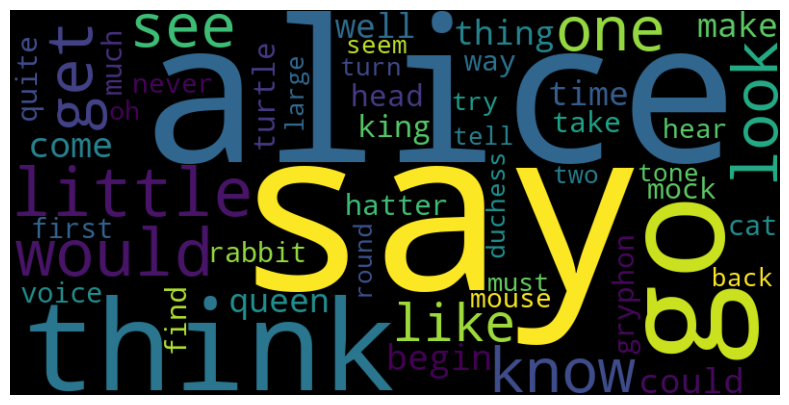

In [60]:
# Display a wordcloud
alice_wordcloud = display_wordcloud(alice_processed_text, max_words = 50)

<h4 style = "text-align: center;">"Moby Dick" by Herman Melville</h4>

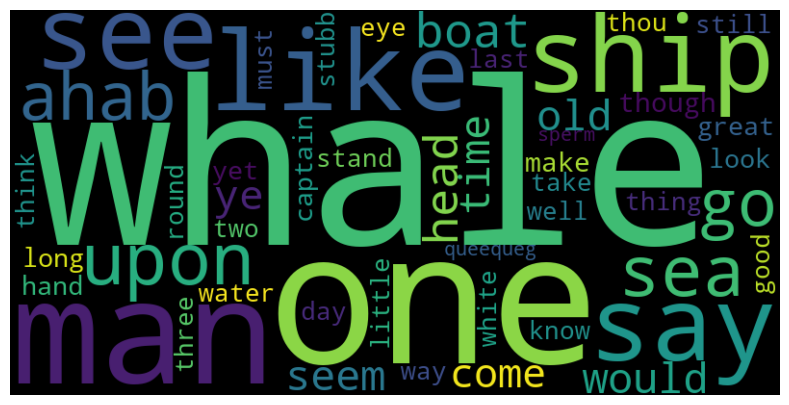

In [62]:
# Display a wordcloud
moby_wordcloud = display_wordcloud(moby_processed_text, max_words = 50)

<h4 style = "text-align: center;">"Leaves of Grass" by Walt Whitman</h4>

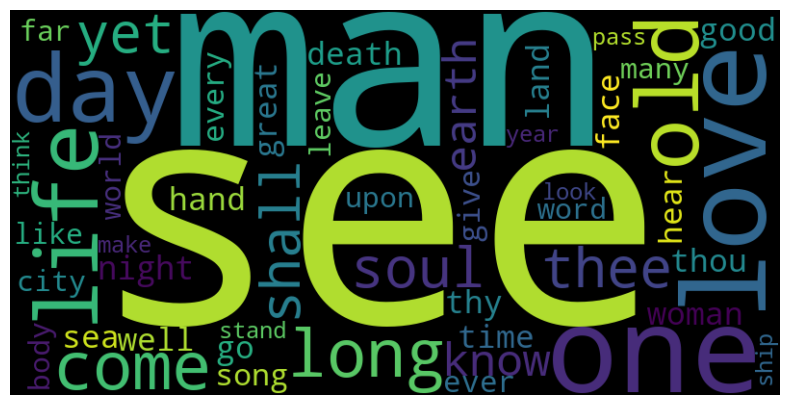

In [64]:
# Display a wordcloud
leaves_wordcloud = display_wordcloud(leaves_processed_text, max_words = 50)

<h3 style = "text-align: center;">Comment(s)</h3>

<ul>
    <li>Themes
        <ul>
            <li>"Alice in Wonderland": Adventure ("go", "see", "look", "make") revolving around a protagonist named Alice ("alice") who interacts a lot ("say", "know", "think") in an medieval-fantasy environment ("queen", "king", "duchess", "gryphon") populated by various animals ("turtle", "cat", "mouse", "rabbit")</li>
            <li>"Moby Dick": Adventure ("go", "see", "come", "make") revolving around a male protagonist ("man") named Ahab ("ahab") who interacts a lot ("say") on a boat ("boat", "ship", "captain") in a maritime environment ("sea", "water") where lives a whale ("whale")</li>
            <li>"Leaves of Grass": Reflection ("see") on various themes like life ("life", "death"), humanity ("man", "woman", "body"), spirituality ("soul", "love", "thee", "thou"), nature ("sea", "land", "earth", "world") and time ("day", "long", "old")
        </ul>
    </li>
</ul>

---
<h2 style = "text-align: center;"><em>Communicate the Results of the Analysis</em></h2>

<ul>
    <li>As the shortest of the three analysed texts, "Alice in Wonderland" (by Lewis Caroll) depicts an adventure revolving around a protagonist named Alice; who interacts a lot in an medieval-fantasy environment populated by various animals</li>
    <br>
    <li>As the longest text, "Moby Dick" (by Herman Melville) depicts an adventure revolving around a male protagonist named Ahab; who interacts a lot on a boat in a maritime environment where lives a whale</li>
    <br>
    <li>As the intermediate-length text, "Leaves of Grass" (by Walt Whitman), reflects on various themes like life, humanity, spirituality, nature and time</li>
</ul>